In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [73]:
train=pd.read_csv("train.csv")

In [74]:
test=pd.read_csv("test.csv")

# **Exploratory Data Analysis (EDA)**

***i) Simple Analysis***



In [7]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
train.shape

(20758, 18)

In [ ]:
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


- Note that there are differences in the scale of the data, so we need to perform scaling.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

- There are some columns with object type, so we need to perform encoding.

In [ ]:
train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

- There is no missing data.

In [ ]:
train.duplicated().sum()

0

- There is no duplicated data

In [ ]:
train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

 ***ii) Visual Analysis***

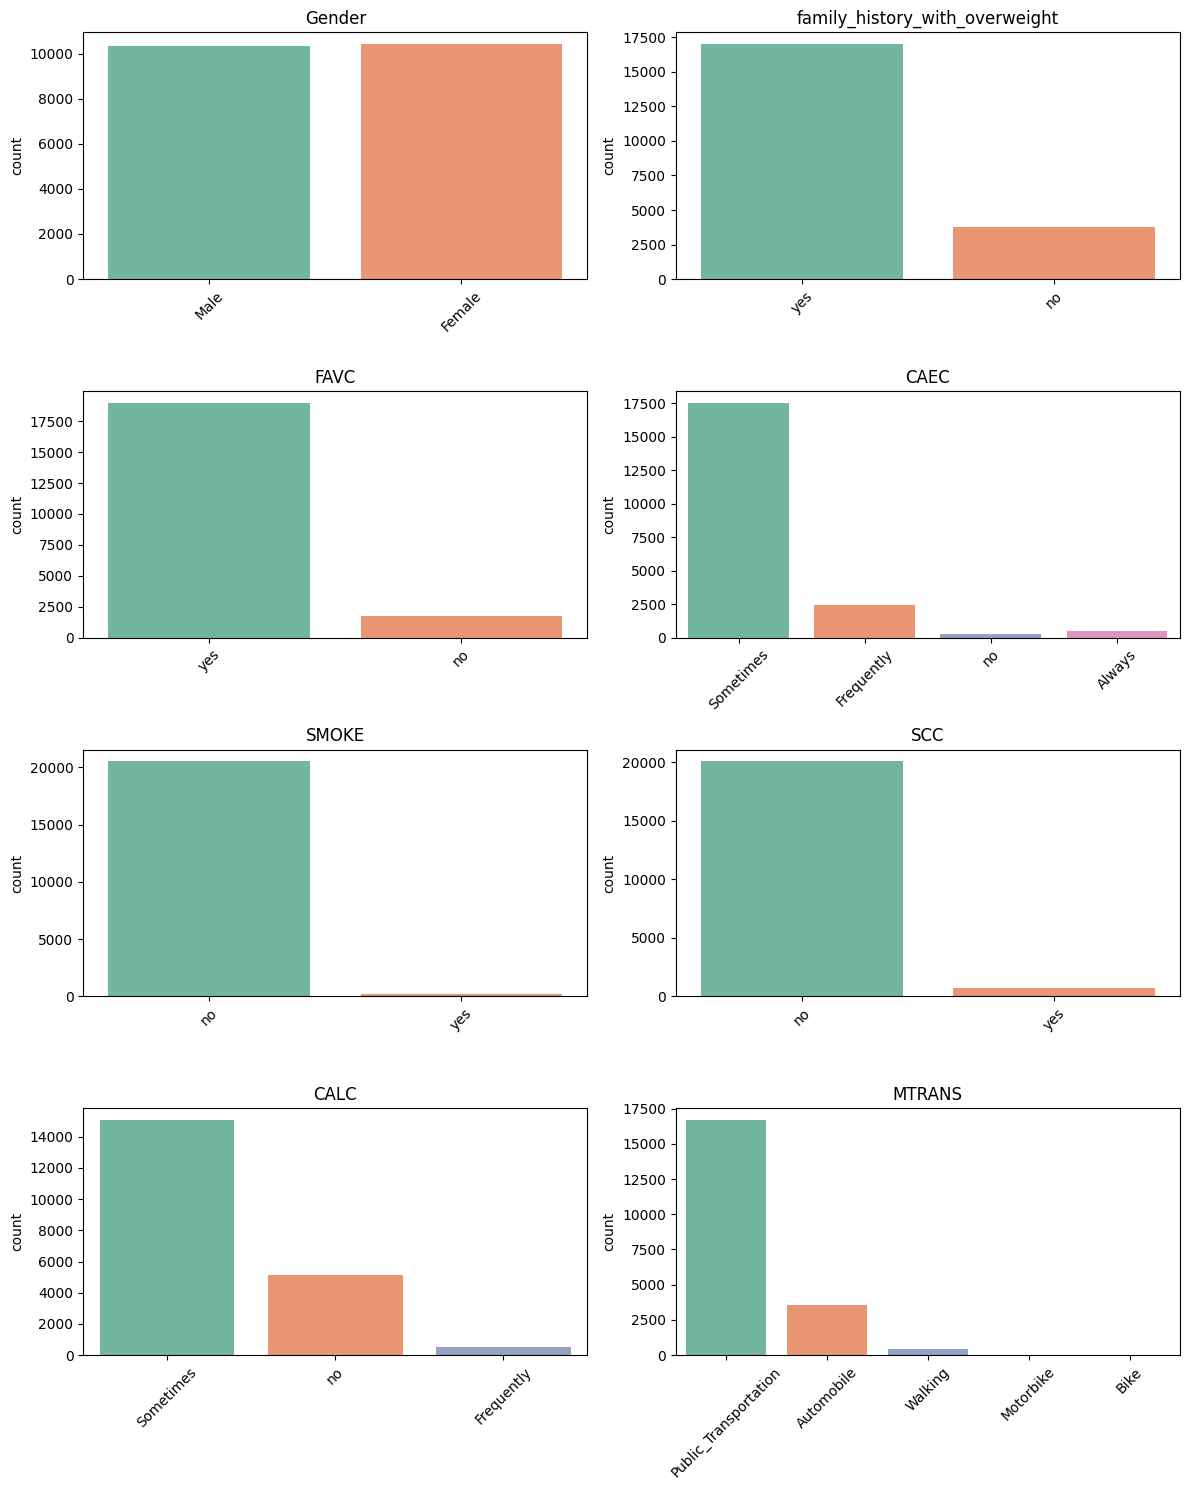

In [ ]:
categorical_features = train.select_dtypes(include=['O']).columns.tolist()
categorical_features.remove('NObeyesdad')

fig, axs = plt.subplots(nrows=4,ncols=2, figsize=(12, 15))

axs = axs.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=train,x=feature,ax=axs[i],palette='Set2')
    axs[i].set_xticklabels(labels=axs[i].get_xticklabels(), rotation=45)
    axs[i].set_xlabel('')
    axs[i].set_title(feature)

plt.tight_layout()
plt.show()

- There are no balance between categories in the same feature.

- The majority of people consume large quantities of food that are high in calories (FAVC).

- Most individuals consume food between meals (CAEC) sometimes.

- We observe a significant difference in the prevalence of smoking among individuals, with varying proportions of smokers and non-smokers. The same pattern is noted for the SCC (Self-Care Commitment) feature.

- Most individuals consume alcoholic beverages (CALC) sometimes.

- As the vast majority of individuals opt for public transportation as their primary mode of commuting, we will delve deeper into the MTRANS feature by examining the distribution of weight classifications.



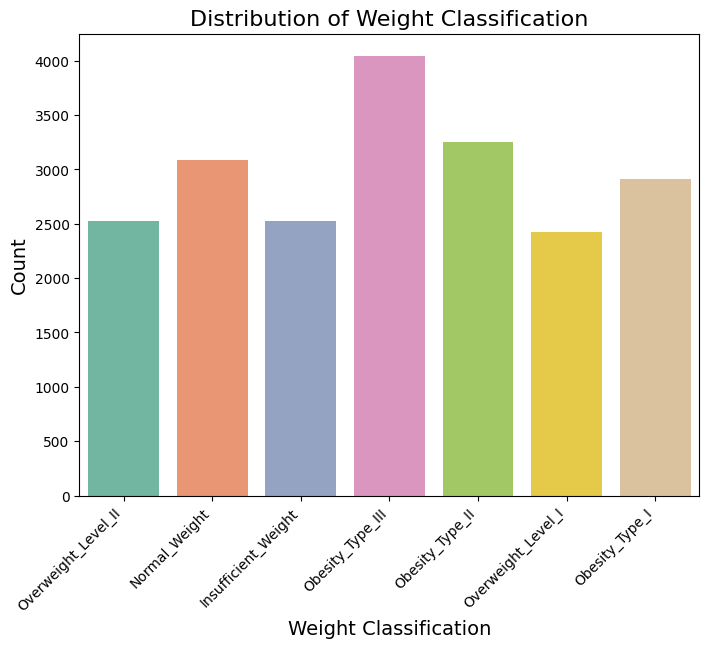

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='NObeyesdad', data=train, palette='Set2')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('Distribution of Weight Classification', fontsize=16)
plt.xlabel('Weight Classification', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

- We notice a relatively balanced distribution across all classes, with "Obesity_Type_III" being the highest . This is good as there will not likely be a bias towards any class during model training for prediction.

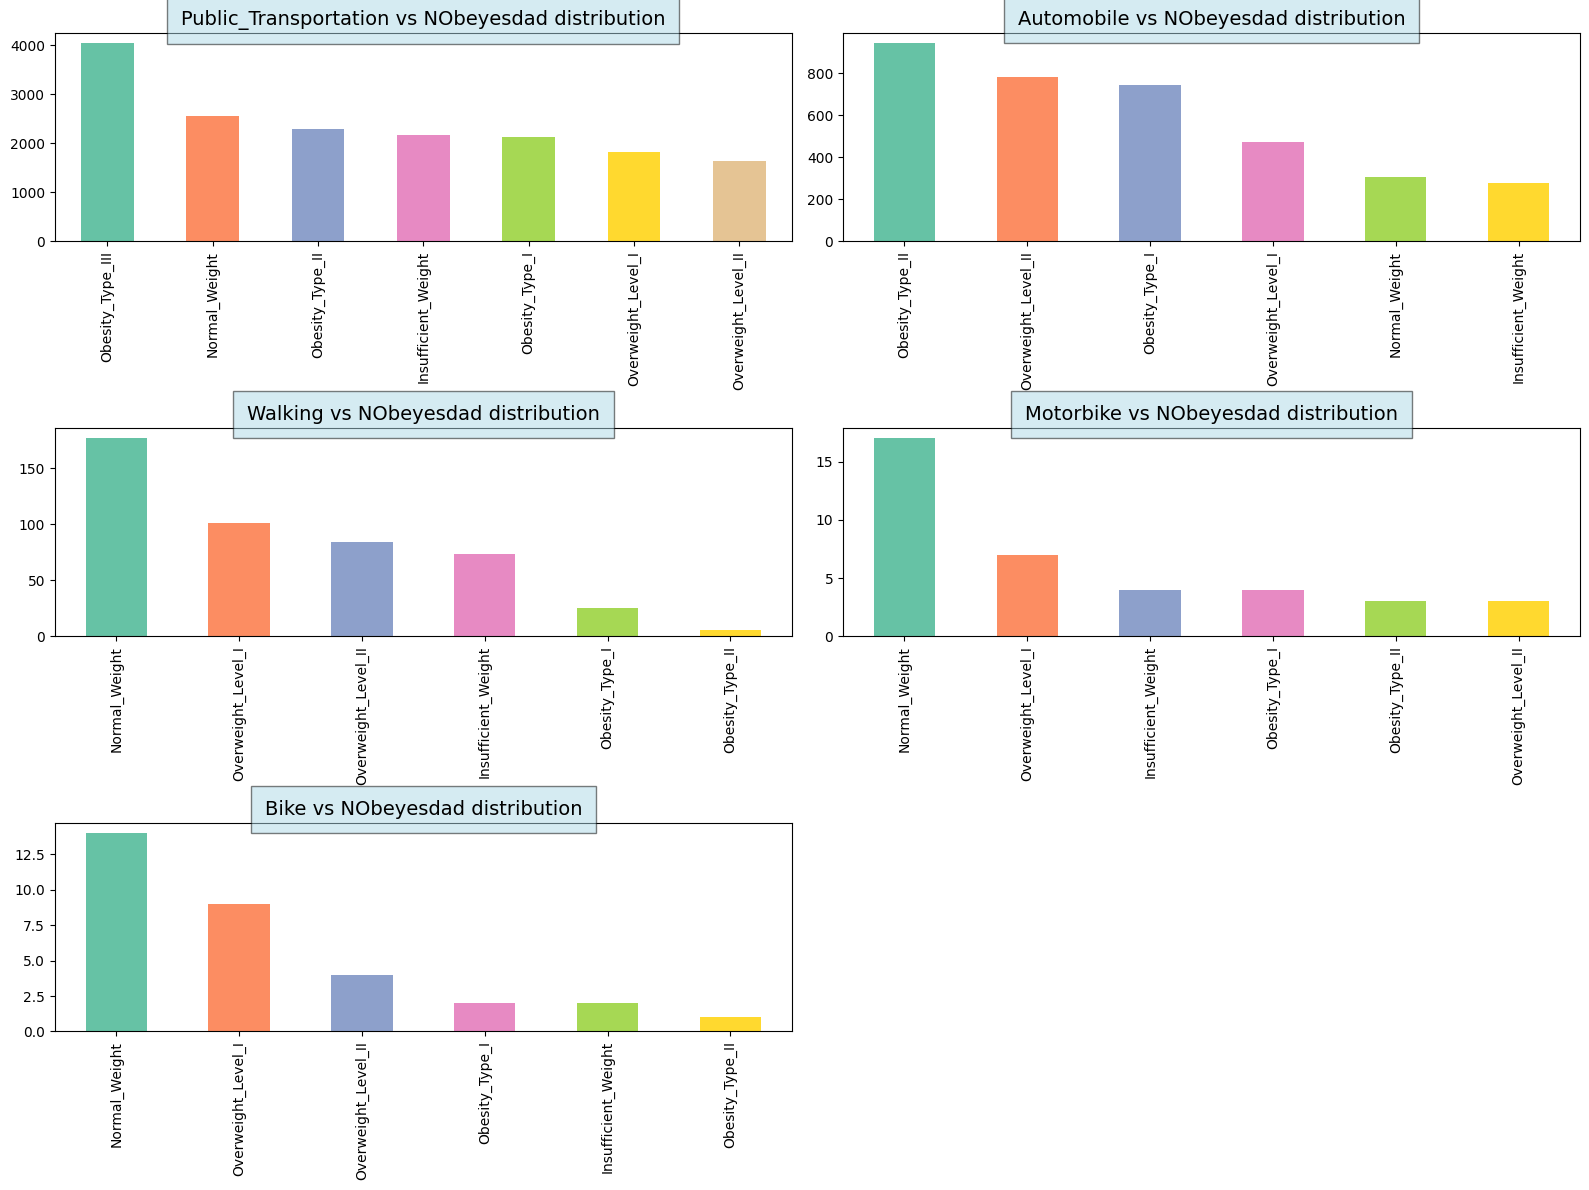

In [ ]:

public_trans = train[train.MTRANS == 'Public_Transportation'].NObeyesdad.value_counts()
automobile_trans = train[train.MTRANS == 'Automobile'].NObeyesdad.value_counts()
walking_trans = train[train.MTRANS == 'Walking'].NObeyesdad.value_counts()
motorbike_trans = train[train.MTRANS == 'Motorbike'].NObeyesdad.value_counts()
bike_trans = train[train.MTRANS == 'Bike'].NObeyesdad.value_counts()


fig, axs = plt.subplots(3, 2, figsize=(16, 12))
axs = axs.flatten()

features = [public_trans, automobile_trans, walking_trans, motorbike_trans, bike_trans]
feature_values = ['Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike']

for i, feature in enumerate(features):
    feature.plot(kind='bar', color=sns.color_palette('Set2'), ax=axs[i])
    axs[i].set_title(f'{feature_values[i]} vs NObeyesdad distribution', fontsize=14,
                     bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10})

axs[-1].axis('off')
plt.tight_layout()
plt.show()


- Individuals who use public transportation as their primary mode of commuting exhibit a slightly higher prevalence of obesity compared to those who use other modes of transportation.


- Among individuals who use automobiles as their primary mode of transportation, there is a relatively even distribution of weight classifications, with a slightly higher proportion of individuals with normal weight.


- Walking as the primary mode of transportation appears to be associated with a lower prevalence of obesity compared to other modes of transportation.


- Motorbike and bike users show a similar distribution of weight classifications, with a relatively higher proportion of individuals with normal weight and a lower proportion of individuals with obesity.


- Overall, the analysis of the bar graphs suggests that the mode of transportation may have some association with weight classification, with public transportation users having a higher likelihood of obesity and walking users having a lower likelihood of obesity.

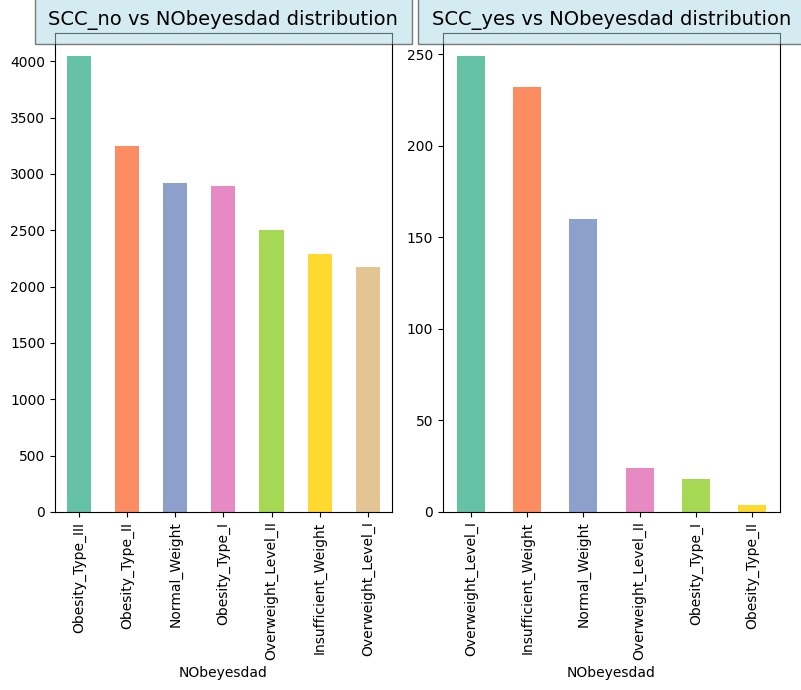

In [ ]:
SCC_no = train[train.SCC == 'no']['NObeyesdad'].value_counts()
SCC_yes = train[train.SCC == 'yes']['NObeyesdad'].value_counts()
feature_values = ['SCC_no', 'SCC_yes']


fig, axs = plt.subplots(1, 2, figsize=(8, 7))
axs = axs.flatten()

for i, feature in enumerate([SCC_no, SCC_yes]):
    feature.plot(kind='bar', color=sns.color_palette('Set2'), ax=axs[i])
    axs[i].set_title(f'{feature_values[i]} vs NObeyesdad distribution', fontsize=14,
                     bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10})
    axs[i].set_xlabel('NObeyesdad')

plt.tight_layout()
plt.show()

- The distribution of weight classifications is significantly different between individuals who have a self-care commitment (SCC) and those who do not.

- Individuals with an SCC are more likely to be obese compared to those without an SCC.

- This suggests that there may be an association between self-care commitment and weight classification, with individuals who have an SCC being more likely to have obesity.

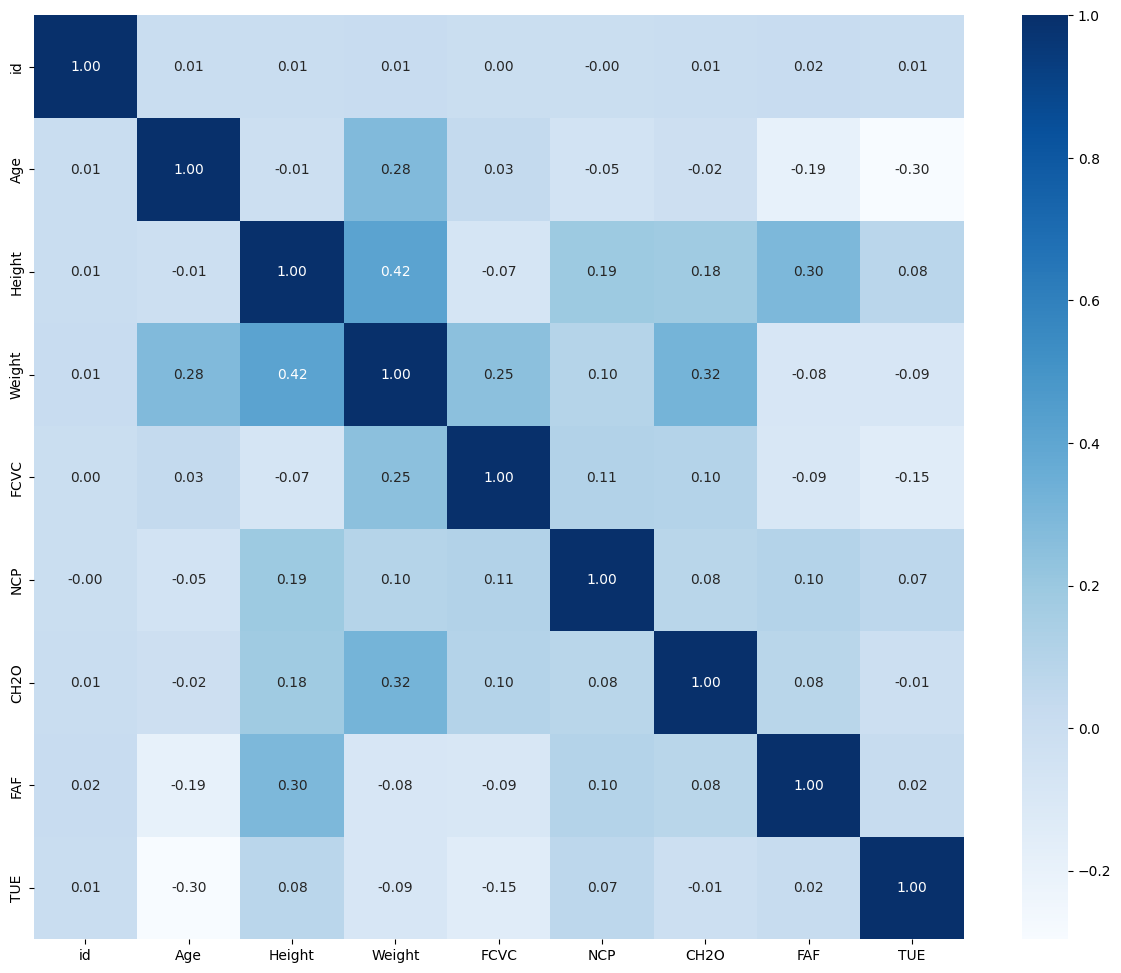

In [ ]:
df_corr=train.select_dtypes(include=["float64","int64"]).corr()
plt.figure(figsize=(15,12))
sns.heatmap(df_corr,annot=True,cmap="Blues",fmt=".2f");

- there are no correlation between features

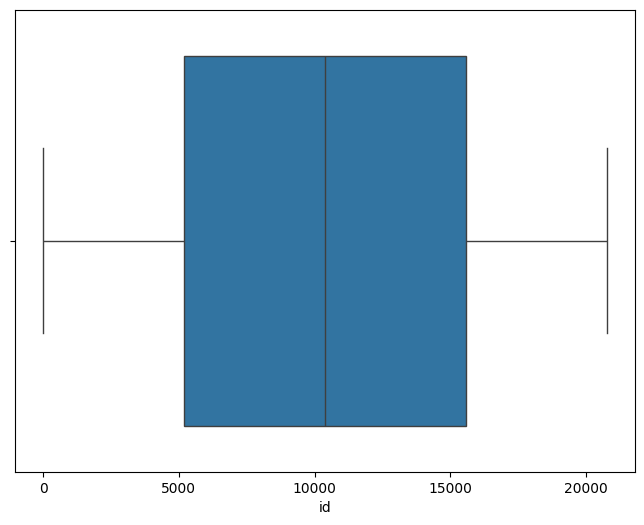

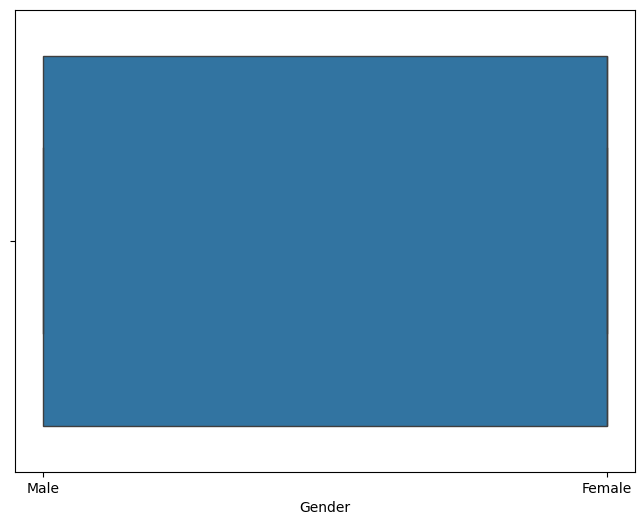

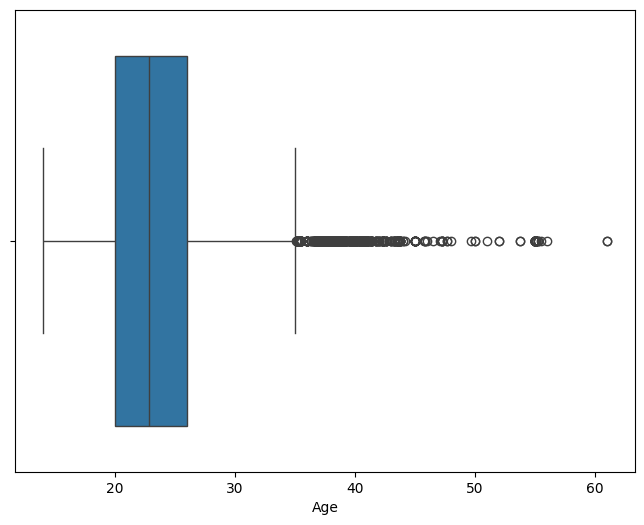

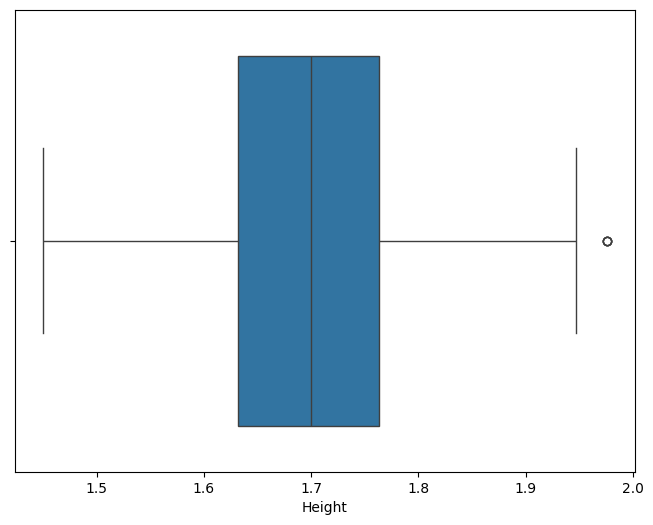

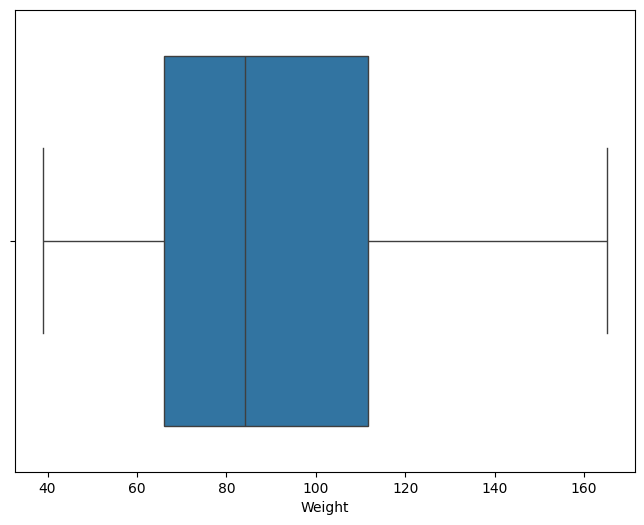

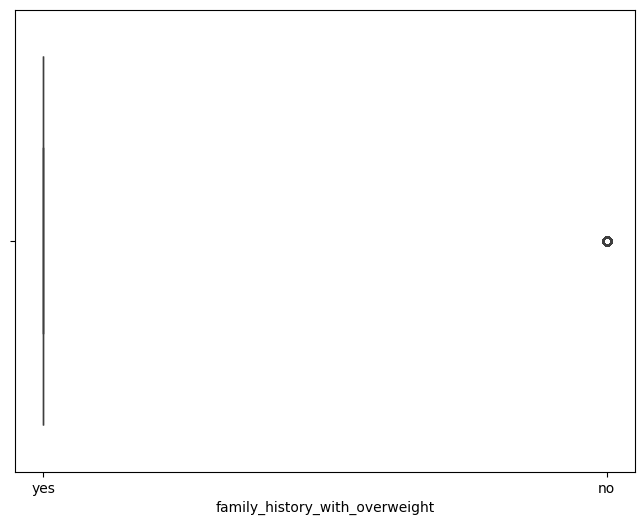

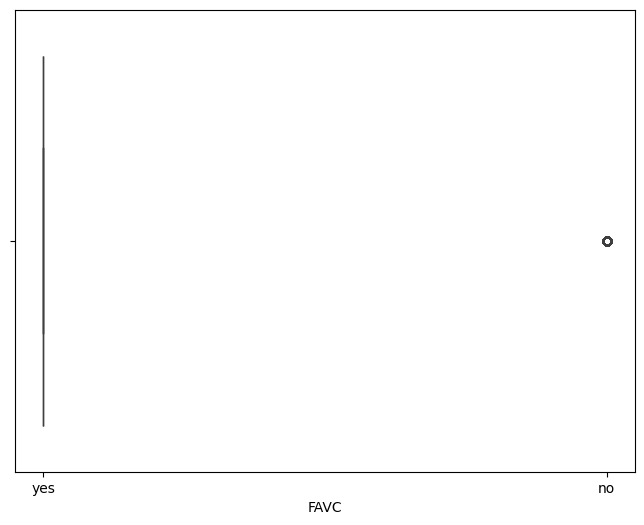

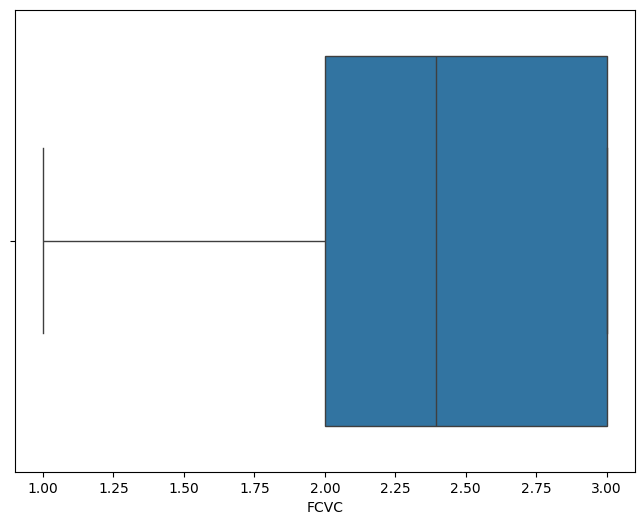

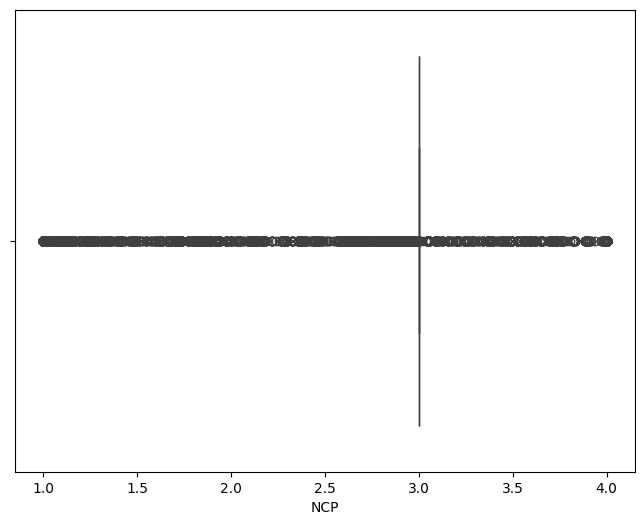

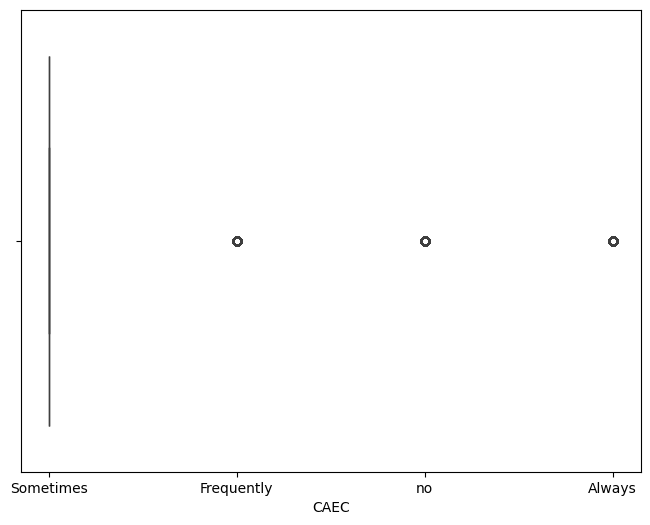

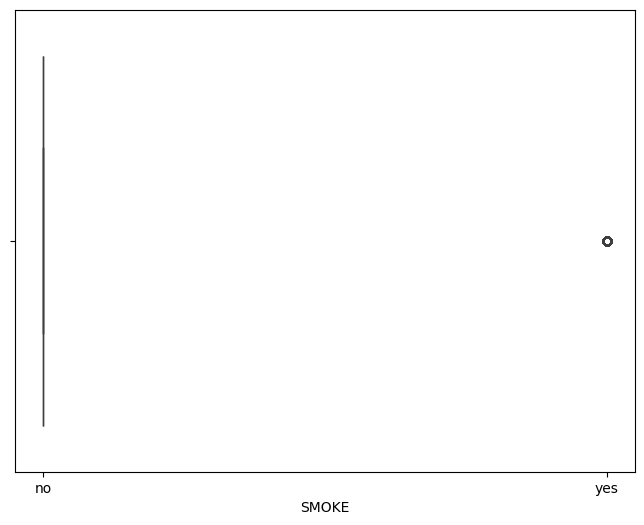

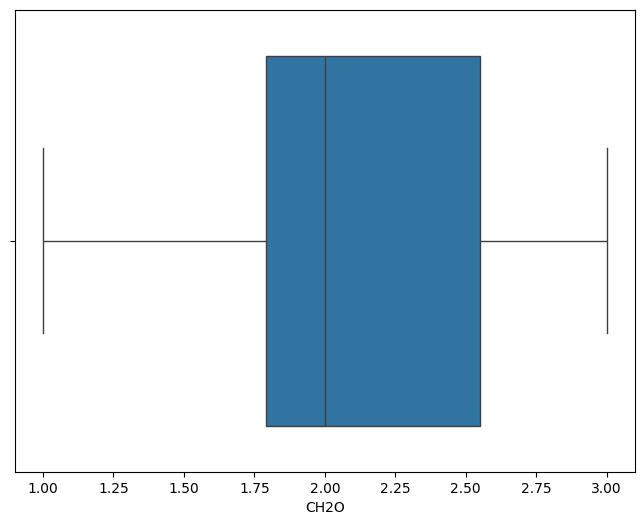

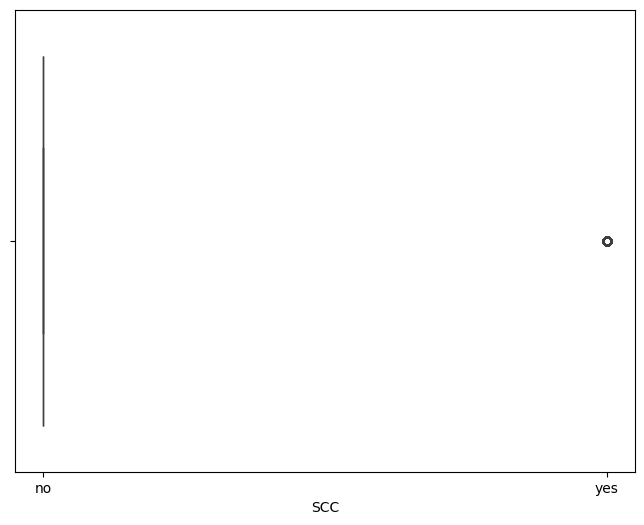

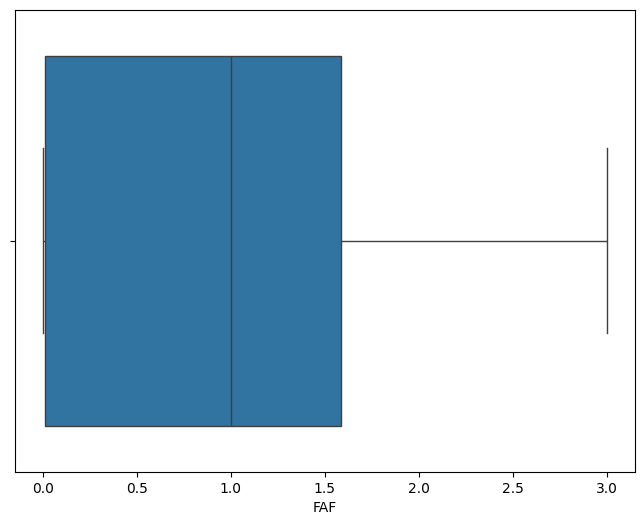

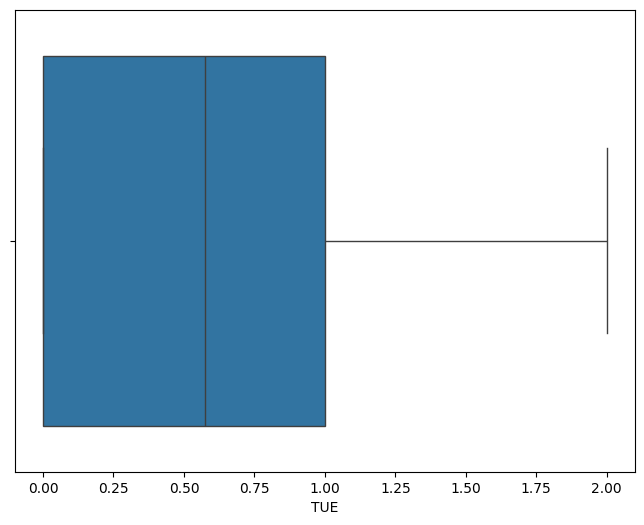

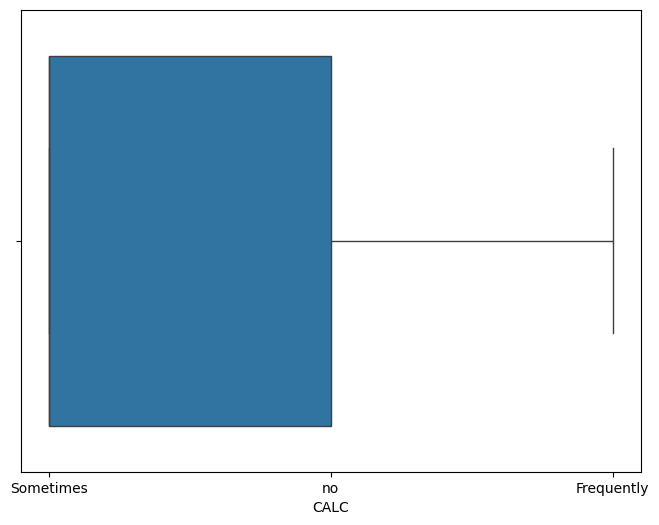

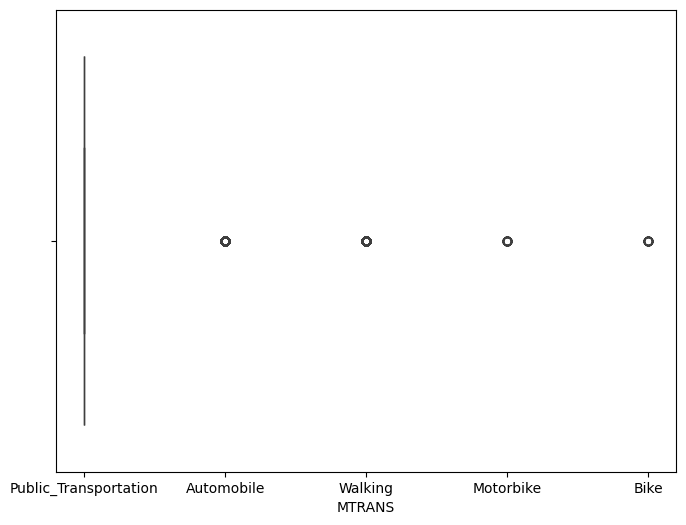

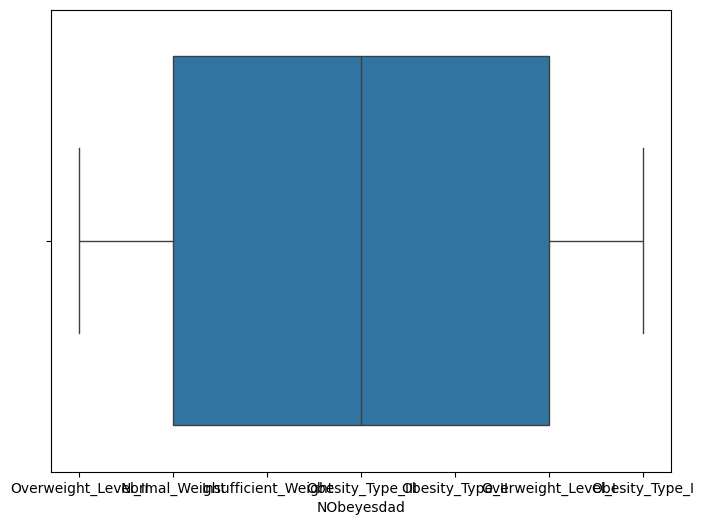

In [ ]:
for col in train.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=train,x=col)
        plt.xlabel(col)
        plt.show()

- there are outliers in some features like Age & NCP

In [ ]:
train.skew()

id        0.000000
Age       1.586252
Height    0.015803
Weight    0.093187
FCVC     -0.356611
NCP      -1.562253
CH2O     -0.212506
FAF       0.505726
TUE       0.670411
dtype: float64

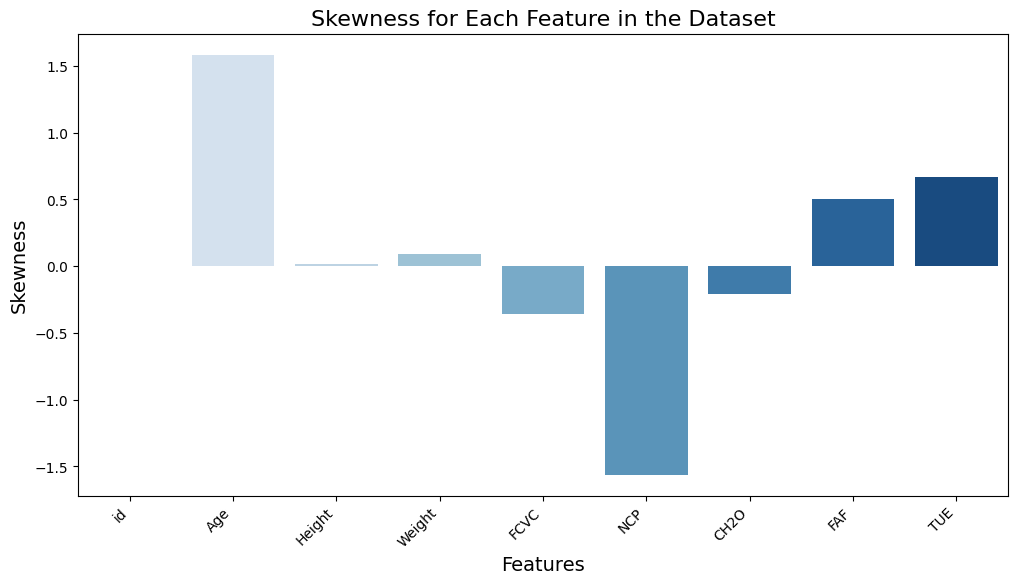

In [ ]:
skew_values = train.skew()

plt.figure(figsize=(12, 6))
sns.barplot(x=skew_values.index, y=skew_values.values, palette='Blues')
plt.title('Skewness for Each Feature in the Dataset', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Skewness', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

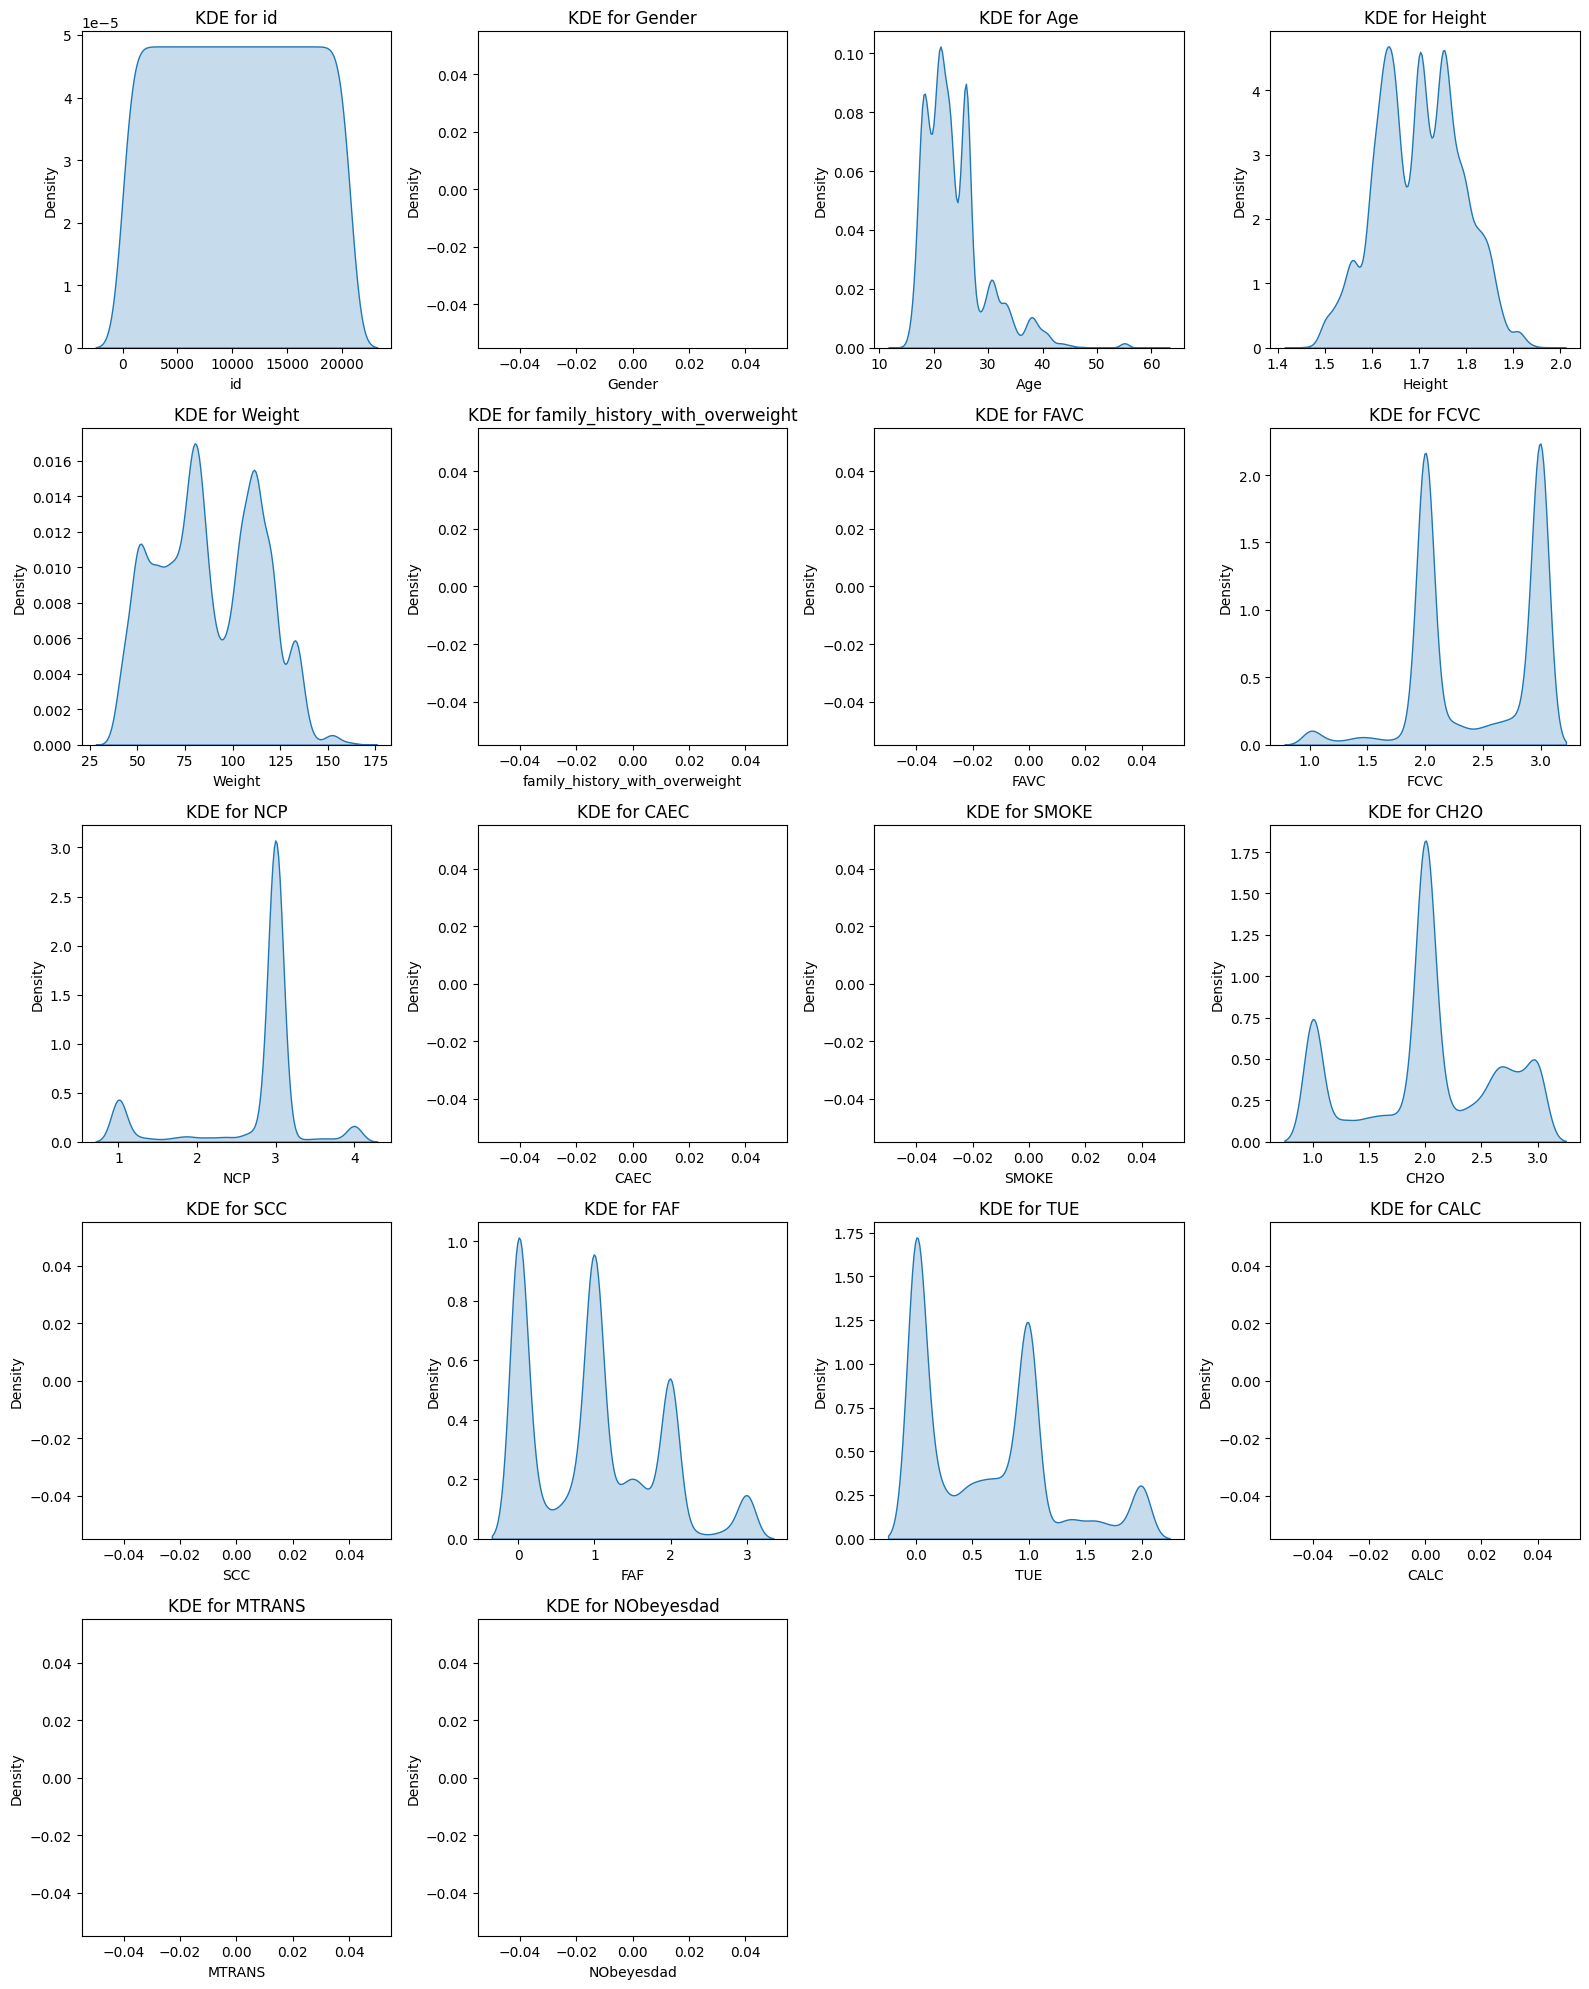

In [ ]:
num_columns = len(train.columns)
num_rows = (num_columns + 3) // 4
plt.figure(figsize=(16, num_rows * 4))

for i, column in enumerate(train.columns, 1):
    if pd.api.types.is_numeric_dtype(train[column].dtype):
        plt.subplot(num_rows, 4, i)
        sns.kdeplot(train[column], fill=True, palette='Blues')
        plt.title(f'KDE for {column}')
        plt.xlabel(column)
        plt.ylabel('Density')

plt.tight_layout()
plt.show()

- There is right skew in feature "Age"= 1.58625
- there is left skew in feature "NCP"= -1.56225

# **4) Data Preparation**

In [75]:
label_encoder=LabelEncoder()

In [76]:
train['Gender'] = label_encoder.fit_transform(train['Gender'])

In [78]:
train['family_history_with_overweight'] = label_encoder.fit_transform(train['family_history_with_overweight'])

In [80]:
train['FAVC'] = label_encoder.fit_transform(train['FAVC'])

In [82]:
train['CAEC'] = label_encoder.fit_transform(train['CAEC'])

In [84]:
train['SMOKE'] = label_encoder.fit_transform(train['SMOKE'])

In [86]:
train['SCC'] = label_encoder.fit_transform(train['SCC'])

In [88]:
train['CALC'] = label_encoder.fit_transform(train['CALC'])

In [91]:
train['MTRANS'] = label_encoder.fit_transform(train['MTRANS'])

In [93]:
train['NObeyesdad'] = label_encoder.fit_transform(train['NObeyesdad'])

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  int32  
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int32  
 6   FAVC                            20758 non-null  int32  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  int32  
 10  SMOKE                           20758 non-null  int32  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [95]:
scaler=StandardScaler()

In [96]:
age_data = np.array(train['Age']).reshape(-1, 1)

In [97]:
train['Age'] = scaler.fit_transform(age_data)

In [100]:
weight_data = np.array(train['Weight']).reshape(-1, 1)

In [101]:
train['Weight']=scaler.fit_transform(weight_data)

In [102]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,0.105699,1.699998,-0.235713,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,6
1,1,0,-1.027052,1.560000,-1.170931,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,1
2,2,0,-1.027052,1.711460,-1.430012,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0
3,3,0,-0.507929,1.710730,1.644770,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,4
4,4,1,1.371197,1.914186,0.224054,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,6


###### Prepare Test Set

In [77]:
test['Gender'] = label_encoder.transform(test['Gender'])

In [79]:
test['family_history_with_overweight'] = label_encoder.transform(test['family_history_with_overweight'])

In [81]:
test['FAVC'] = label_encoder.transform(test['FAVC'])

In [83]:
test['CAEC'] = label_encoder.transform(test['CAEC'])

In [85]:
test['SMOKE'] = label_encoder.transform(test['SMOKE'])

In [87]:
test['SCC'] = label_encoder.transform(test['SCC'])

In [90]:
test['CALC'] = label_encoder.fit_transform(test['CALC'])

In [92]:
test['MTRANS'] = label_encoder.transform(test['MTRANS'])

In [98]:
age_test = np.array(test['Age']).reshape(-1, 1)

In [99]:
test['Age']=scaler.transform(age_test) 

In [103]:
weight_test = np.array(test['Weight']).reshape(-1, 1)

In [104]:
test['Weight']=scaler.transform(weight_test)

In [105]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,1,0.537644,1.848294,1.241770,1,1,2.938616,3.000000,2,0,2.825629,0,0.855400,0.000000,2,3
1,20759,0,-0.499620,1.600000,-0.829748,1,1,2.000000,1.000000,2,0,3.000000,0,1.000000,0.000000,2,3
2,20760,0,0.379434,1.643355,0.898933,1,1,3.000000,3.000000,2,0,2.621877,0,0.000000,0.250502,2,3
3,20761,1,-0.503267,1.553127,0.598259,1,1,2.000000,2.977909,2,0,2.786417,0,0.094851,0.000000,2,3
4,20762,0,0.379434,1.627396,0.642469,1,1,3.000000,3.000000,2,0,2.653531,0,0.000000,0.741069,2,3


# **GradientBoostingClassifier Model**

 **i) Baseline Model Training**